# Chris Klausmeier's model for arid vegetation patterns

When you approach the Sahara desert from the south, rainfall is in increasingly lower supply. You would expect the vegetation to gradually become sparser and sparser, until nothing else remains than desert sand.

On the edge of the desert, however, something remarkable occurs. The bushland vegetation starts to develop strikingly regular patterns, in the form of stripes, dots, gaps, or over labyrinth shapes.

![title](https://johanvandekoppel.files.wordpress.com/2011/07/tigerbush-bar.jpg "Arid vegetation patterns")

To understand how these patterns form, a young Chris Klausmeier made a very simple model, that deals with how vegetation interactions with rainwater. Rainwater does not infiltrate well on the clayey soils where these patterns are typically found. However, where plants grow, they open up the soil, allowing rainfall to infiltrate, stimulating vegetation growth, leading to even better infiltration. In other words, where more plants grow, there is more water for the plants to consume.

Chris made a very simple mathematical model to capture this feedback processes. This model described the local dynamics of water $w$ and plants $n$:
$$
\begin{aligned}
\frac{dw}{dt}&=a-w-wn^{2}+d_{w}\frac{dw}{dx} \\
\frac{dn}{dt}&= wn^{2} -mn +d_{w}\frac{d^{2}n}{dx^{2}}
\end{aligned}
$$
Below we implement this model in iPython

### Loading some crucial python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

# Widening the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Parameter definitions 

In [2]:
# Parameters       Original value    Explanation and Units
a        = 1.5     # 2.0             Rainfall rate
m        = 0.45    # 0.45            Mortality rate

v        = 182.0   # 182             The downslope advection of W 
dw       = 10.0    # 10              The diffusion constant of W
dn       = 1.0     # 1.0             The diffusion constant of N

In [3]:
size     = 100     # size of the 2D grid
length   = 100.    # length of the domain, forces as a float with a .
dx = length / size # space step
dy = length / size # space step

### Simulation settings

In [4]:
EndTime  = 20.0    # total runtime
dt       = .001    # time step
n        = 10      # number of plot updates

### Colormap definitions

In [5]:
Vegcolors = [(0.80, 0.58, 0.34), (0.97, 0.89, 0.62), (0.51, 0.63, 0.27), 
             (0.38, 0.51, 0.22), (0.31, 0.40, 0.21), (0.21, 0.32, 0.20)]
VegMap = LinearSegmentedColormap.from_list('AridVeg', Vegcolors, N=100)

### Defining the functions that compute the first and second order derivatives

In [6]:
def d2_dxy2(Z): # Second order derivative that assumes periodic boundary conditions
    Ztop = np.roll(Z, 1, axis=0)
    Zbottom = np.roll(Z, -1, axis=0)    
    Zleft = np.roll(Z, 1, axis=1)
    Zright = np.roll(Z, -1, axis=1)
    return (Zleft + Zright   - 2 * Z) / dx**2 + (Ztop  + Zbottom  - 2 * Z) / dy**2

In [7]:
def d_dy(Z): # First order derivative that assumes periodic boundary conditions
    Ztop = np.roll(Z, 1, axis=0)
    Zcenter = Z[:,:]
    return (Zcenter - Ztop) / dy

In [8]:
def show_patterns(U, ax=None):
    im=ax.imshow(U, cmap=VegMap, clim=(0,20),
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()
    return im

### Initializing the data arrays and giving them starting values

In [9]:
np.random.seed(10)
W = np.zeros((size, size))+1.0
N = (np.random.rand(size, size)<0.05)*1.0 + 1.0

### The main simulation loop

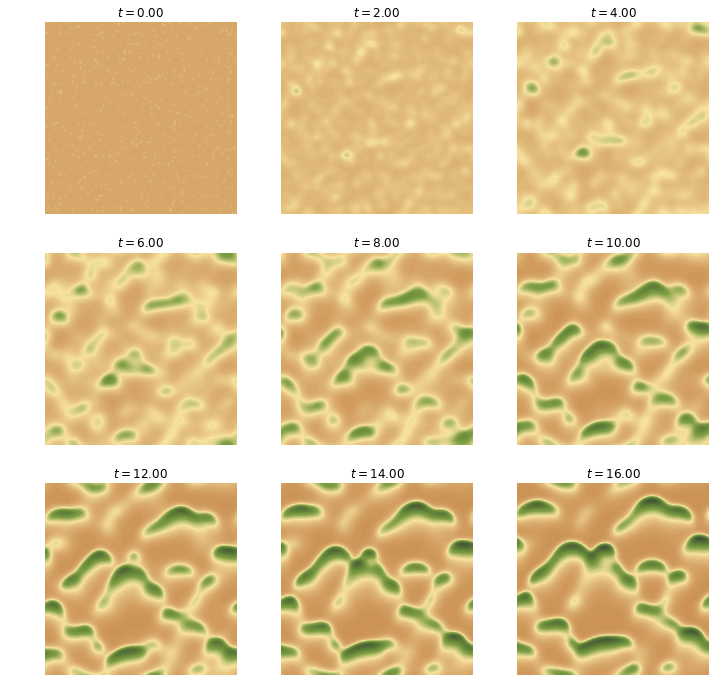

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
step_plot = int(EndTime / dt) // n
# We simulate the PDE with the finite difference
# method.
for i in range(int(EndTime / dt)):
 
    # We update the variables.
    W, N = \
        W + dt * ( a - W - W*N*N - v*d_dy(W) + dw * d2_dxy2(W)),\
        N + dt * ( W*N*N - m*N + dn * d2_dxy2(N))

    # We plot the state of the system at
    # 9 different times.
    if i % step_plot == 0 and i < ((n-1) * step_plot):
        ax = axes.flat[i // step_plot]
        show_patterns(N, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

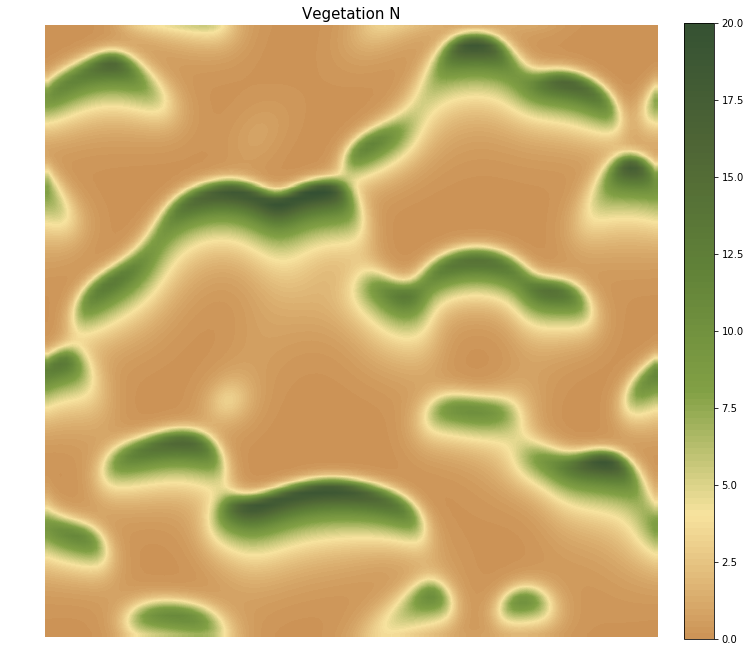

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
im=show_patterns(N, ax=ax)
ax.set_title('Vegetation N', fontsize=15)
f=fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

© Johan van de Koppel, NIOZ-Yerseke 2018